In [1]:
import numpy
import pandas
import matplotlib
import seaborn
%matplotlib inline

/Users/michaelweinstein/anaconda/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
fileName = 'VariantCallsetFiltering_Data-UCLA2016/VariantCallsetFiltering/sandbox/NA12878.Combined.table'

In [3]:
data = pandas.DataFrame.from_csv(fileName, header=0, index_col=(0,1), sep = "\t")

In [4]:
data.describe()

,QD,FS
count,90953.000000,90959.000000
mean,17.943937,7.322305
std,8.514839,18.898314
min,0.100000,0.000000
25%,11.870000,0.000000
50%,16.370000,2.218000
75%,25.680000,6.162000
max,41.660000,464.005000


In [5]:
#displaying the dataset.  Two level indexing by chromosome and position
data

set     QD      FS
CHROM POS                                   
20    61098               H-V  16.95   0.991
      61795               H-V  22.18   0.000
      63244               H-V  17.85   1.797
      63799               H-V  19.63   8.413
      65900               H-V  17.25   0.670
      66370               H-V  18.02   4.629
      66720               H-V  12.59   3.736
      68749      Intersection  28.51   0.000
      70980      Intersection  11.75   0.813
      72892      Intersection  11.12   3.863
      74347      Intersection  11.97   1.735
      76771      Intersection  12.35   0.812
      76962      Intersection  24.05   1.996
      79234      Intersection  12.43   1.653
      80481      Intersection  11.24   3.853
      80655      Intersection  27.41  28.751
      82012      Intersection  11.55   3.447
      82074      Intersection  32.28   0.878
      82079      Intersection  32.68   0.927
      82217      Intersection  23.41   0.997
      83252               H-V    NaN   2.482
      83254               H-V    NaN   1.162
      83260               H-V  15.06   3.047
      83275               H-V  21.94   0.000
      90008      Intersection  24.09   0.840
      91088      Intersection  26.60   1.902
      91508      Intersection  26.58   0.000
      91707      Intersection  13.98   0.686
      92527      Intersection  23.57   0.000
      93440      Intersection  10.16   2.679
...                       ...    ...     ...
      62935690  FilteredInAll   8.04   0.000
      62939406  FilteredInAll   9.38   0.594
      62939499  FilteredInAll   4.58   2.086
      62940189    H-filterInV   3.18  20.876
      62940492  FilteredInAll  16.39   1.133
      62940552  FilteredInAll   3.17  29.256
      62940577  FilteredInAll  17.59  40.843
      62940615  FilteredInAll  18.03  13.772
      62940698  FilteredInAll   8.88   8.237
      62940904    H-filterInV   2.87   3.452
      62941042    H-filterInV   2.27   9.978
      62942097  FilteredInAll   2.91   4.126
      62944987  FilteredInAll  10.55   1.976
      62949861            H-V  12.65   0.000
      62950005            H-V  15.25   2.599
      62952477            H-V   9.25   6.001
      62952956    H-filterInV  15.00   0.000
      62953043    H-filterInV  18.06   2.887
      62953047    H-filterInV  18.83   0.000
      62953051    H-filterInV  17.47   0.000
      62953055    H-filterInV  15.01   1.705
      62953059    H-filterInV  13.97   1.657
      62954871            H-V  12.28   4.926
      62955706            H-V  14.41  13.385
      62957957  FilteredInAll  12.94   2.137
      62959363    H-filterInV  20.56   9.641
      62961318  FilteredInAll   7.32   5.316
      62961724    H-filterInV   8.44   2.723
      62962130    H-filterInV  32.52   0.000
      62962891    H-filterInV   9.50   3.153

[91073 rows x 3 columns]

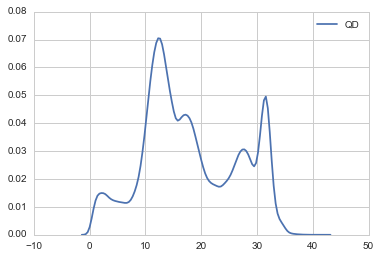

In [6]:
seaborn.set_style('whitegrid')
seaborn.kdeplot(data['QD'], bw=0.5)

In [7]:
#longer method, generating slices of the dataset.  Dropna method removes lines containing missing data.
intersection = data.where(data['set'] == "Intersection").dropna()
ghfilterinv = data.where(data['set'] == "G-H-filterInV").dropna()
gfilterinhv = data.where(data['set'] == "G-filterInH-V").dropna()
gfilterinhfilterinv = data.where(data['set'] == "G-filterInH-filterInV").dropna()

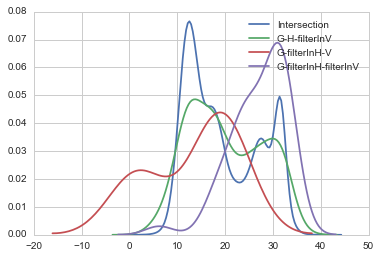

In [8]:
#Generating several plots from the slices
seaborn.kdeplot(intersection['QD'], label = "Intersection")
seaborn.kdeplot(ghfilterinv['QD'], label = "G-H-filterInV")
seaborn.kdeplot(gfilterinhv['QD'], label = "G-filterInH-V")
seaborn.kdeplot(gfilterinhfilterinv['QD'], label = "G-filterInH-filterInV")
matplotlib.pyplot.legend()

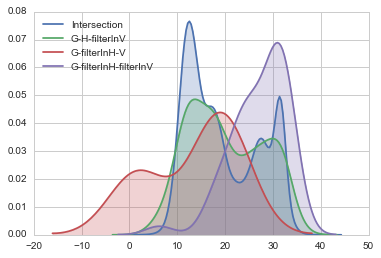

In [9]:
#Making slightly prettier plots, adding shading and relocating the legend
seaborn.kdeplot(intersection['QD'], shade = True, label = "Intersection")
seaborn.kdeplot(ghfilterinv['QD'], shade = True, label = "G-H-filterInV")
seaborn.kdeplot(gfilterinhv['QD'], shade = True, label = "G-filterInH-V")
seaborn.kdeplot(gfilterinhfilterinv['QD'], shade = True, label = "G-filterInH-filterInV")
matplotlib.pyplot.legend(loc = 2)

In [10]:
#Slightly more efficient way, generating a new subset with all lines missing data removed
cleanedData = data.dropna()
values = list(pandas.unique(cleanedData['set']))
values

['H-V',
 'Intersection',
 'H-filterInV',
 'FilteredInAll',
 'G-filterInH-filterInV',
 'G-H-filterInV',
 'filterInH-V',
 'G-filterInH-V']

In [11]:
#Just displaying the new dataset
cleanedData

set     QD      FS
CHROM POS                                   
20    61098               H-V  16.95   0.991
      61795               H-V  22.18   0.000
      63244               H-V  17.85   1.797
      63799               H-V  19.63   8.413
      65900               H-V  17.25   0.670
      66370               H-V  18.02   4.629
      66720               H-V  12.59   3.736
      68749      Intersection  28.51   0.000
      70980      Intersection  11.75   0.813
      72892      Intersection  11.12   3.863
      74347      Intersection  11.97   1.735
      76771      Intersection  12.35   0.812
      76962      Intersection  24.05   1.996
      79234      Intersection  12.43   1.653
      80481      Intersection  11.24   3.853
      80655      Intersection  27.41  28.751
      82012      Intersection  11.55   3.447
      82074      Intersection  32.28   0.878
      82079      Intersection  32.68   0.927
      82217      Intersection  23.41   0.997
      83260               H-V  15.06   3.047
      83275               H-V  21.94   0.000
      90008      Intersection  24.09   0.840
      91088      Intersection  26.60   1.902
      91508      Intersection  26.58   0.000
      91707      Intersection  13.98   0.686
      92527      Intersection  23.57   0.000
      93440      Intersection  10.16   2.679
      93931      Intersection  11.11  12.594
      100699     Intersection  13.90   0.000
...                       ...    ...     ...
      62935690  FilteredInAll   8.04   0.000
      62939406  FilteredInAll   9.38   0.594
      62939499  FilteredInAll   4.58   2.086
      62940189    H-filterInV   3.18  20.876
      62940492  FilteredInAll  16.39   1.133
      62940552  FilteredInAll   3.17  29.256
      62940577  FilteredInAll  17.59  40.843
      62940615  FilteredInAll  18.03  13.772
      62940698  FilteredInAll   8.88   8.237
      62940904    H-filterInV   2.87   3.452
      62941042    H-filterInV   2.27   9.978
      62942097  FilteredInAll   2.91   4.126
      62944987  FilteredInAll  10.55   1.976
      62949861            H-V  12.65   0.000
      62950005            H-V  15.25   2.599
      62952477            H-V   9.25   6.001
      62952956    H-filterInV  15.00   0.000
      62953043    H-filterInV  18.06   2.887
      62953047    H-filterInV  18.83   0.000
      62953051    H-filterInV  17.47   0.000
      62953055    H-filterInV  15.01   1.705
      62953059    H-filterInV  13.97   1.657
      62954871            H-V  12.28   4.926
      62955706            H-V  14.41  13.385
      62957957  FilteredInAll  12.94   2.137
      62959363    H-filterInV  20.56   9.641
      62961318  FilteredInAll   7.32   5.316
      62961724    H-filterInV   8.44   2.723
      62962130    H-filterInV  32.52   0.000
      62962891    H-filterInV   9.50   3.153

[90953 rows x 3 columns]

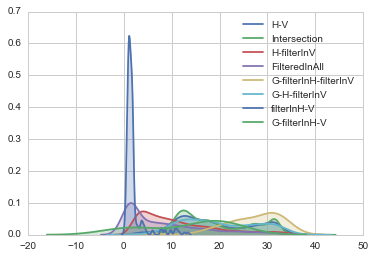

In [12]:
#Graphing iteratively
subsets = {}
for value in values:
    try:
        subsets[value] = cleanedData.where(cleanedData['set'] == value)
        seaborn.kdeplot(subsets[value]['QD'], shade = True, label = value)
    except:
        print("Unable to print" + value)
matplotlib.pyplot.legend(loc = 1)

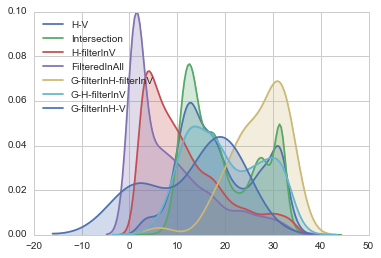

In [13]:
#Graphing iteratively again, but leaving off the value that was blowing everything out
subsets = {}
limitedValues = ["Intersection", "G-H-filterInV", "G-filterInH-V", "G-filterInH-filterInV"]
for value in values:
    try:
        if not value == "filterInH-V":
            subsets[value] = cleanedData.where(cleanedData['set'] == value)
            seaborn.kdeplot(subsets[value]['QD'], shade = True, label = value)
    except:
        print("Unable to print" + value)
matplotlib.pyplot.legend(loc = 2)